In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_confirmed = pd.read_csv('time_series_2019-ncov-Confirmed.csv')

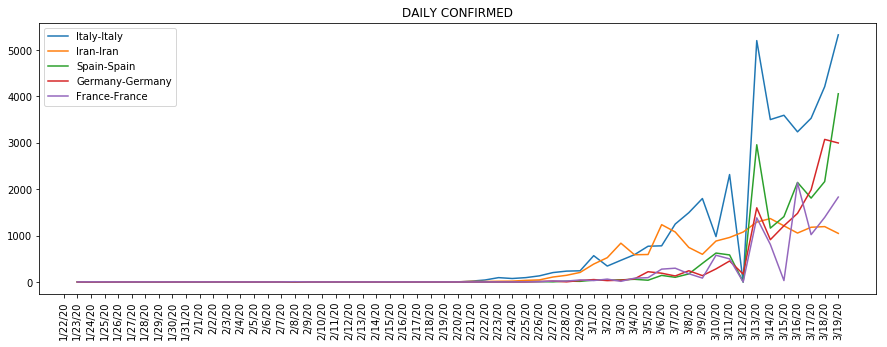

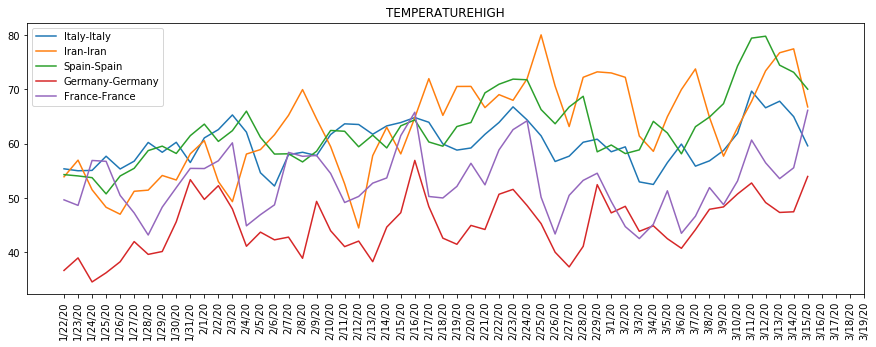

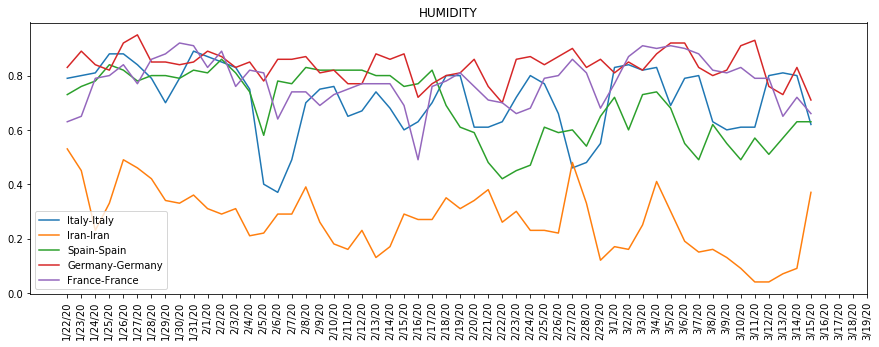

In [19]:
region_idx = 0
last_date = '3-16-20'
conutries= ['Italy','Germany','France','Spain','Korea','Iran','Japan','Switzerland', 
            'United Kingdom','Netherlands','Norway','Sweden','Austria','Belgium'] 
plt.figure(figsize=(15, 5))
plt.title('DAILY CONFIRMED')
for region_idx in range(len(df_confirmed)):
    region_data = df_confirmed.iloc[region_idx,:-1]
    country = region_data['Country/Region']
    Province_State = region_data['Province/State']
    if "nan"  in str(Province_State):
        Province_State = country
    if Province_State not in conutries:
        continue
    name = 'weather/'+country+"-"+Province_State+"-"+last_date+"20.csv"
    weather_data = pd.read_csv(name,index_col=0)
    values = region_data.iloc[4:].values
    values = pd.Series(values).astype(float).diff().astype(float)
    plt.plot(values,label = country+"-"+Province_State)
    
    if region_idx>5:
        break

plt.xticks(np.arange(len(region_data.iloc[4:])),region_data.iloc[4:].index,rotation='vertical')
plt.legend()
plt.show()

for plt_variable in ['temperatureHigh','humidity']:
    plt.figure(figsize=(15, 5))
    plt.title(plt_variable.upper())
    for region_idx in range(len(df_confirmed)):
        region_data = df_confirmed.iloc[region_idx,:-1]
        country = region_data['Country/Region']
        Province_State = region_data['Province/State']
        if "nan"  in str(Province_State):
            Province_State = country
        if Province_State not in conutries:
            continue
        name = 'weather/'+country+"-"+Province_State+"-"+last_date+"20.csv"
        weather_data = pd.read_csv(name,index_col=0)
        values = weather_data[region_data.index[4:-4]+str(20)].loc[plt_variable].values.astype(float)
        
        plt.plot(values,label= country+"-"+Province_State)

        if region_idx>5:
            break
    plt.xticks(np.arange(len(region_data.iloc[4:])),region_data.iloc[4:].index,rotation='vertical')
    plt.legend()
    plt.show()